# Project: Write a Data Science Blog Post

## Business or Real World Understanding
    Brief description
    Question 1 : How education may influence salary ?
    Question 2 : How YearsCodedJob may influence salary ? 
    Question 3 : The country distribution of the user group
    Question 4 : I want to know the gender situation of the user group, if possible, give me a simple analysis on this situation and any measures ?

## Data understanding
Every year, Stack Overflow conducts a massive survey of people on its site, covering all sorts of information like programming languages, salary, code style and various other information. In 2017, the survey amassed more than 64,000 responses fielded from 213 countries.

## Prepare Data
### Gather Data

In [1]:
import pandas as pd

In [2]:
data_schema = pd.read_csv("survey_results_schema.csv")

In [3]:
data = pd.read_csv("survey_results_public.csv")

### Data Access

In [4]:
data_schema.head(n=2)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?


In [5]:
data.head(n=2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


## Clean Data

In [6]:
data = data.loc[:, ['Respondent', 'Country', 'YearsCodedJob','FormalEducation', 'CareerSatisfaction', 'Gender', 'Salary']]

In [7]:
data.head(5)

,Respondent,Country,YearsCodedJob,FormalEducation,CareerSatisfaction,Gender,Salary
0,1,United States,NaN,Secondary school,NaN,Male,NaN
1,2,United Kingdom,NaN,Some college/university study without earning ...,NaN,Male,NaN
2,3,United Kingdom,20 or more years,Bachelor's degree,8.0,Male,113750.0
3,4,United States,9 to 10 years,Doctoral degree,6.0,Male,NaN
4,5,Switzerland,10 to 11 years,Master's degree,6.0,NaN,NaN


Now the dataset is more clear, we could focus on the variables that used in our Project.
Since the dataset is a survey, so i don't clean the records contains NaN value. For the later specific analysis, the records contain NaN value will be ignored. 

For an example, in Question 1 How education may influence salary? The records without Salary record (NaN in Salary column) will not be calculated in the mean salary result for analysis. We only take the records with the specific columns we need to calculate. Since this is a survey, so there are many NaN in the dataframe, if we delete all the records contains NaN value. This will cause we lose many valuable records.

Becaue our calculation could affect the data frame, so here i do the deep copy of origin data and applied the copied data frame.

In [42]:
data_for_q1 = data.copy(deep=True)
data_for_q2 = data.copy(deep=True)
data_for_q3 = data.copy(deep=True)
data_for_q4 = data.copy(deep=True)

## Evaluation

### Qustion 1 How education may influence salary ?
#### Analysis

In [43]:
def grouping_mean_function(data, column_name):
    """
    return grouped dataframe for the mean value of column_name
    input:
        data_path: a path to the csv
    output:
        a dataframe with the column_name variable grouped, the other column name with the mean value
    """
    grouped_df = data.groupby([column_name]).mean().reset_index()
    return grouped_df

In [44]:
result1 = grouping_mean_function(data_for_q1, 'FormalEducation')

In [45]:
result1[['FormalEducation', 'Salary']]

,FormalEducation,Salary
0,Bachelor's degree,56914.358553
1,Doctoral degree,78527.933053
2,I never completed any formal education,44430.660621
3,I prefer not to answer,38284.836141
4,Master's degree,58250.838766
5,Primary/elementary school,62677.337356
6,Professional degree,39503.658863
7,Secondary school,40395.148419
8,Some college/university study without earning ...,55912.810459


#### Visualise

In [46]:
result1_sorted = result1.sort_values(by='Salary', ascending = True)

<AxesSubplot:ylabel='FormalEducation'>

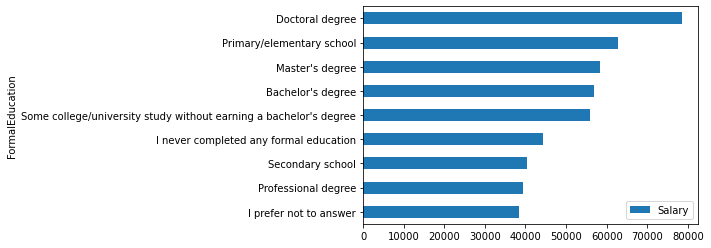

In [47]:
result1_sorted.plot.barh(x='FormalEducation', y='Salary')

#### Brief explanation for visualisation

From the visualization result, we could find that the developers with doctoral degree have the highest mean salary. But it's strange that the developers with the Primary/elementary school formal education have the second highest mean salary. 

### Question 2 : How YearsCodedJob may influence salary ? 

#### Analyse

In [48]:
result2 = grouping_mean_function(data_for_q2, 'YearsCodedJob')

In [49]:
result2_sorted = result2.sort_values(by='Salary', ascending = True)

#### Visualise

<AxesSubplot:xlabel='YearsCodedJob'>

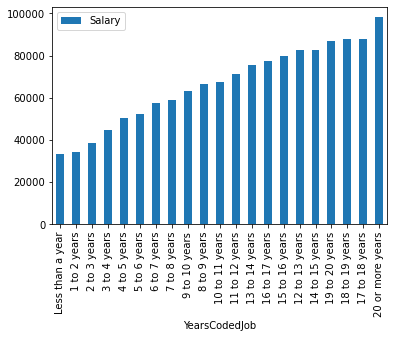

In [50]:
result2_sorted.plot.bar(x='YearsCodedJob', y='Salary')

#### Brief explanation for visualisation
In the visualisation,the relation between Salary with the YearsCodedJob is very clear. The developers with longer working experience have higher salary. The kind of relationship is almost linearly.

### Question 3 : The country distribution of the user group

#### Visualise

<AxesSubplot:ylabel='Country'>

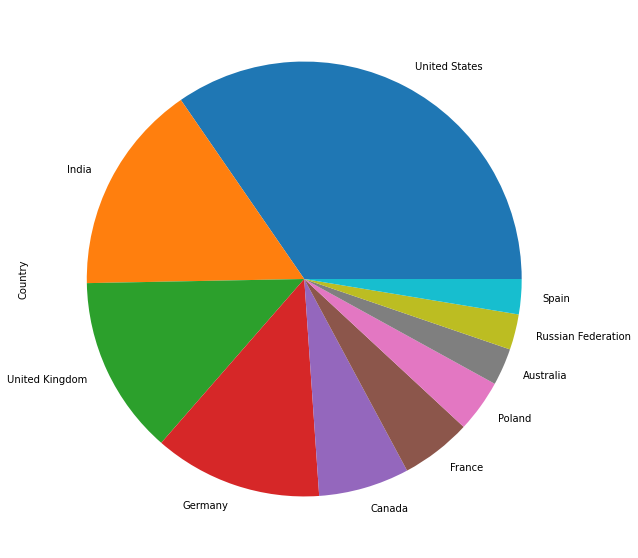

In [51]:
data['Country'].value_counts()[0:10].plot(kind='pie', figsize=(12,10))

#### Brief explanation for visualisation
From this visualisation, we could see that the users' countries distribution. There are most developers in this survey in United States, then India and United Kingdom, etc.

### Question 4 : I want to know the gender situation of the user group, if possible, give me a simple analysis on this situation and any measures ?

#### Visualise

In [52]:
data[data['Gender']=='Female']['Salary'].describe()

count       819.000000
mean      58083.924534
std       38607.488222
min           0.000000
25%       31250.000000
50%       52500.000000
75%       83000.000000
max      195000.000000
Name: Salary, dtype: float64

In [53]:
data[data['Gender']=='Male']['Salary'].describe()

count     10666.000000
mean      56996.494293
std       39722.918323
min           0.000000
25%       27262.626263
50%       50537.634409
75%       80000.000000
max      197000.000000
Name: Salary, dtype: float64

#### Brief explanation for visualisation
we could find the amount of female developers’ record is only 819, for the male developer the number is 10666. There are much fewer female developers. The mean salary for female developers is 58083, the mean salary for male developer is 56996. The female developer group has a higher mean salary. In my opinion, the salary difference between female developers and male developers is acceptable. But we should encourage more female developers to start their programming career.